In [31]:
!sudo apt-get install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (152 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readli

In [32]:
pip install pyzbar 

In [33]:
pip install opencv-python

In [34]:
pip install opencv-contrib-python

In [0]:
import imutils

In [0]:
#url = 'https://techdocs.zebra.com/simulscan/1-1/guide/templatebuilder/AIAG%20B-10%20Label%20File%20P,%20Q,%20K,%20V,%204S.jpg'
#url = 'https://7692c1718b49acf33773-1627e5bd7a24837cad84622fe09b3933.ssl.cf1.rackcdn.com/news/wp-content/uploads/2016/10/example.jpg'
url = 'https://www.jaystoragesolutions.com/images/our-product/marking&identification/marking&identification1.png'

In [0]:
from skimage import io
image_url = io.imread(url)

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

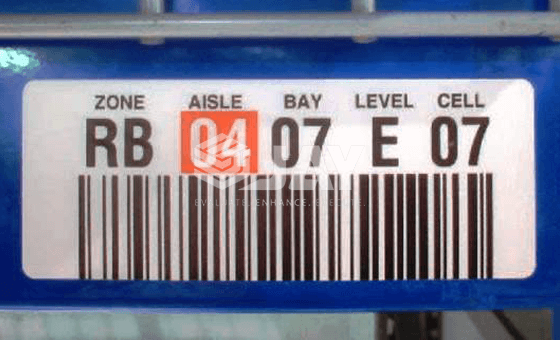

In [236]:
from google.colab.patches import cv2_imshow
Img = cv2_imshow(image_url)

In [237]:
image_url.shape

(340, 560, 4)

In [0]:
image_gray = cv2.cvtColor(image_url, cv2.COLOR_BGR2GRAY)

In [0]:
frame = imutils.resize(image_gray, width=image_url.shape[1])

In [240]:
frame.shape

(340, 560)

In [0]:
from pyzbar import pyzbar
barcodes = pyzbar.decode(frame)

[INFO] Found CODE128 barcode: RB0407E07


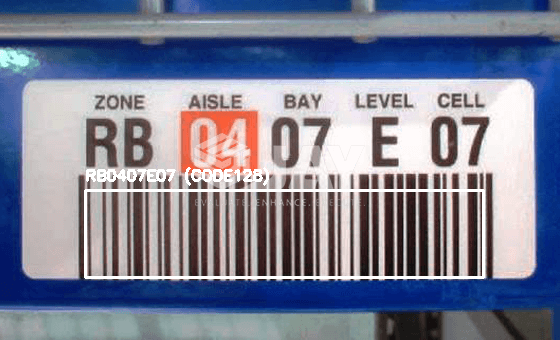

In [242]:
from google.colab.patches import cv2_imshow

# loop over the detected barcodes
for barcode in barcodes:
	# extract the bounding box location of the barcode and draw the
	# bounding box surrounding the barcode on the image
	(x, y, w, h) = barcode.rect
	cv2.rectangle(image_url, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
	# the barcode data is a bytes object so if we want to draw it on
	# our output image we need to convert it to a string first
	barcodeData = barcode.data.decode("utf-8")
	barcodeType = barcode.type
 
	# draw the barcode data and barcode type on the image
	text = "{} ({})".format(barcodeData, barcodeType)
	cv2.putText(image_url, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (0, 0, 255), 2)
 
	# print the barcode type and data to the terminal
	print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))
 
# show the output image
#cv2.imshow("Image", image)
cv2_imshow(image_url)
#cv2.waitKey(0)